In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [5]:
df = pd.read_csv("./datasets/FinalDataset.csv",index_col='Unnamed: 0')
# df['a36'] = l.fit_transform(df['a36'])
df.to_csv('./datasets/GBC.csv',index=None)
df

,Age,Gender,Grading,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,exponential_gldm_GrayLevelNonUniformity,exponential_gldm_GrayLevelVariance,exponential_gldm_HighGrayLevelEmphasis,exponential_gldm_LargeDependenceEmphasis,exponential_gldm_LargeDependenceHighGrayLevelEmphasis,exponential_gldm_LargeDependenceLowGrayLevelEmphasis,exponential_gldm_LowGrayLevelEmphasis,exponential_gldm_SmallDependenceEmphasis,exponential_gldm_SmallDependenceHighGrayLevelEmphasis,exponential_gldm_SmallDependenceLowGrayLevelEmphasis
0,0.566667,0.0,0,0.615858,0.614714,0.376782,0.357435,0.325185,0.291356,0.224012,...,0.082904,0.0,0.0,0.465907,0.465907,0.465907,0.0,0.125050,0.125050,0.125050
1,0.633333,0.0,0,0.043370,0.074396,0.015177,0.250141,0.200435,0.000551,0.180785,...,0.011880,0.0,0.0,0.607542,0.607542,0.607542,0.0,0.057302,0.057302,0.057302
2,0.366667,0.0,0,0.901565,0.826886,0.075283,0.000000,0.044652,0.046012,0.012592,...,0.011233,0.0,0.0,0.387533,0.387533,0.387533,0.0,0.105813,0.105813,0.105813
3,0.533333,1.0,2,0.083983,0.177305,0.115296,0.366075,0.184076,0.131897,0.122530,...,0.064821,0.0,0.0,0.658494,0.658494,0.658494,0.0,0.054456,0.054456,0.054456
4,0.383333,0.0,0,0.628585,0.558281,0.317661,0.329358,0.461813,0.827748,0.284453,...,0.542612,0.0,0.0,0.900256,0.900256,0.900256,0.0,0.016430,0.016430,0.016430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.266667,0.0,0,0.078590,0.113826,0.062268,0.327796,0.220658,0.060125,0.009298,...,0.044875,0.0,0.0,0.768749,0.768749,0.768749,0.0,0.050731,0.050731,0.050731
102,0.516667,0.0,2,0.832916,0.876501,1.000000,0.725470,0.582547,0.786080,0.535697,...,0.062815,0.0,0.0,0.317295,0.317295,0.317295,0.0,0.190744,0.190744,0.190744
103,0.366667,0.0,0,0.911283,0.991022,0.293318,0.134336,0.181522,0.306008,0.129880,...,0.332963,0.0,0.0,0.901868,0.901868,0.901868,0.0,0.017758,0.017758,0.017758
104,0.483333,0.0,4,0.460111,0.436798,0.320181,0.426423,0.307071,0.375546,0.361316,...,0.334616,0.0,0.0,0.799813,0.799813,0.799813,0.0,0.040960,0.040960,0.040960


In [5]:
df["Label"].value_counts()

1    62
6    50
7    21
4    17
3    13
2     6
5     1
Name: Label, dtype: int64

In [6]:
df['Species'] = l.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1)[['a0', 'a3', 'a4', 'a5', 'a6', 'a10', 'a11', 'a13', 'a14', 'a15', 'a16',
       'a20', 'a24', 'a25', 'a27', 'a33', 'a36', 'a41', 'a45', 'a46', 'a52',
       'a53', 'a54', 'a55', 'a56', 'a59']], df['Class'] ,random_state=112, test_size=0.25)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
val = clf.score(X_test, y_test)
whole_accuracy = val
print("Total Acc: ", val)

Total Acc:  0.7692307692307693


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, roc_auc_score

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "fmeasure": make_scorer(f1_score, average="weighted", zero_division=0),
    "precision": make_scorer(precision_score, average="weighted", zero_division=0),
    "recall": make_scorer(recall_score, average="weighted", zero_division=0),
    "roc": make_scorer(roc_auc_score, average="weighted", multi_class="ovr", needs_proba=True)
}


X = df.drop("Age Class",axis=1)
y = df['Age Class']

X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=104, test_size=0.25)

model = KNeighborsClassifier()
gridVals = {'n_neighbors':range(1,11)}
grid_model = GridSearchCV(estimator=model,param_grid=gridVals,scoring=scoring,cv=5,return_train_score=False,refit="accuracy")
grid_model.fit(X_train,y_train)

predicted = grid_model.best_estimator_.predict(X_test)
res = pd.DataFrame(grid_model.cv_results_)

res.to_csv("./rr.csv")

KeyError: "['Age Class'] not found in axis"

In [10]:
df2 = pd.read_csv("./datasets/cirrhosis.csv",sep=',')
# df2['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [24]:
len(dd["quality"].unique())

6

In [77]:
df = pd.read_csv("./tables/acc_table.txt",sep=",")
# columns = max(df["k"])
# scoresnb = []
# for i in range(1,columns):
#     scoresnb.append(df.query("fs_method=='corr' and model=='nb' and k=={}".format(i))["accuracy"].iloc[0])
# scoresnb.append(df.query("fs_method=='nofs' and model=='nb' and k=={}".format(columns))["accuracy"].iloc[0])
# scoresnb
df

,dataset,model,fs_method,k,accuracy,fmeasure,precision,recall,roc
0,iris,knn,corr,2,0.966667,0.966381,0.971717,0.966667,0.994333
1,parkinsons,knn,lrs,4,0.897436,0.892396,0.920421,0.897436,0.957739
2,cirrhosis,rf,rfc,12,0.519220,0.486699,0.515859,0.519220,0.704767
3,diabetes,rf,rfe,7,0.776131,0.770220,0.777042,0.776131,0.831139
4,heart_disease,lr,lrs,9,0.845254,0.843612,0.850780,0.845254,0.890931
5,sonar,lr,lass,14,0.788734,0.786074,0.813511,0.788734,0.845393
6,stroke,lr,lrs,6,0.957833,0.937592,0.933950,0.957833,0.846511
7,wine,nb,tree,4,0.586458,0.563411,0.565553,0.586458,0.762724
8,breast,knn,lass,25,0.973638,0.973477,0.974469,0.973638,0.992060


In [75]:
df.query("accuracy == accuracy.max()").query("k == k.min()")

,model,fs_method,k,accuracy,fmeasure,precision,recall,roc
1237,knn,lass,25,0.973638,0.973477,0.974469,0.973638,0.99206


In [78]:
df.query("dataset == '{}'".format("iris"))

,dataset,model,fs_method,k,accuracy,fmeasure,precision,recall,roc
0,iris,knn,corr,2,0.966667,0.966381,0.971717,0.966667,0.994333


In [80]:
score_df = pd.read_csv("./results/iris.txt")
score_df

,model,fs_method,k,accuracy,fmeasure,precision,recall,roc
0,lr,nofs,4,0.926667,0.925698,0.933263,0.926667,0.982333
1,nb,nofs,4,0.953333,0.953047,0.958384,0.953333,0.993333
2,knn,nofs,4,0.960000,0.959900,0.962290,0.960000,0.997333
3,rf,nofs,4,0.966667,0.966482,0.970707,0.966667,0.989167
4,dt,nofs,4,0.966667,0.966583,0.968350,0.966667,0.975000
...,...,...,...,...,...,...,...,...
150,lr,rfc,3,0.940000,0.939445,0.946717,0.940000,0.990667
151,nb,rfc,3,0.960000,0.959832,0.963434,0.960000,0.995333
152,knn,rfc,3,0.960000,0.959900,0.962290,0.960000,0.996667
153,rf,rfc,3,0.960000,0.959832,0.963434,0.960000,0.991333


In [39]:
score_df.query("")

,model,fs_method,k,accuracy,fmeasure,precision,recall,roc
0,lr,nofs,30,0.963096,0.962799,0.964036,0.963096,0.992753
1,nb,nofs,30,0.927930,0.927769,0.929421,0.927930,0.983923
2,knn,nofs,30,0.966620,0.966449,0.967493,0.966620,0.987167
3,rf,nofs,30,0.957848,0.957653,0.958421,0.957848,0.991397
4,dt,nofs,30,0.919112,0.919428,0.923193,0.919112,0.918267
...,...,...,...,...,...,...,...,...
1450,lr,rfc,29,0.963096,0.962799,0.964036,0.963096,0.992753
1451,nb,rfc,29,0.927930,0.927769,0.929421,0.927930,0.983856
1452,knn,rfc,29,0.973638,0.973567,0.973988,0.973638,0.985134
1453,rf,rfc,29,0.963127,0.963025,0.963926,0.963127,0.992480


In [57]:
q = "fs_method=='{}' and model=='{}' and k=={}".format(
                    "corr", "nb", 20)
acc = df.query(q)["accuracy"].iloc[0]
acc

0.9402577239559072

In [54]:
q

"fs_method=='nofs' and model=='nb' and k==20"

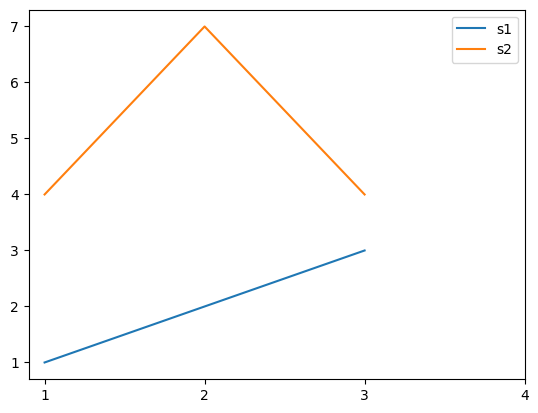

In [49]:
import matplotlib.pyplot as plt
s1 = [1,2,3]
s2 = [4,7,4]
plt.plot([1,2,3],s1,label="s1")
plt.plot([1,2,3],s2,label="s2")
plt.legend()
plt.xticks([1,2,3,4])
plt.show()


<AxesSubplot:>

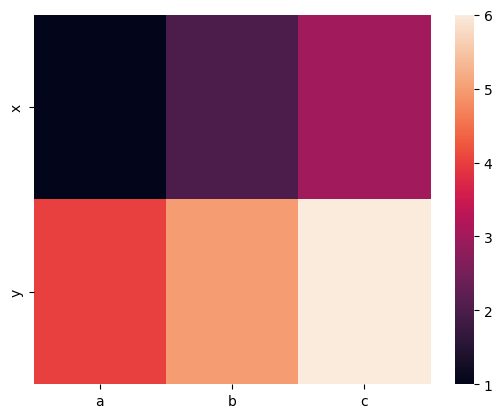

In [87]:
data = [[1,2,3],
        [4,5,6]]
sns.heatmap(np.array(data),xticklabels=['a','b','c'],yticklabels=['x','y'])

In [5]:
df = pd.read_csv("./datasets/stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
